<a href="https://colab.research.google.com/github/Pandagan-85/ZTM-Machine-learning/blob/main/end_to_end_dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multi-Class Dog Breed Classification
This notebook builds an end-to-end mult-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and i take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The Data we're using is from Kaggle's dog breed identification competition. [qui](https://www.kaggle.com/c/dog-breed-identification/data)

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed for each test image. [qui](www.kaggle.com/competitions/dog-breed-identification/overview/evaluation)
```
id,affenpinscher,afghan_hound,..,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,0.0083,0.0,...,0.0083
etc.
```

## 4. Features
Some information about the data:
* We're dealing with images(unstructured data) so it's problaby best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (These images have labels)
* There are around 10,000+ images in the test set  (These images have no labels, because we'll want to predict them.)

In [3]:
# Unzip the uploaded data to Google Drive
#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

## Get out workspace ready
* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅

In [2]:
# Import TensorFlow into Colab
import tensorflow as tf
print("TF version:", tf.__version__)

TF version: 2.18.0


In [4]:
# Import TensorFlow Hub
import tensorflow_hub as hub
print("TF Hub version:", hub.__version__)

TF Hub version: 0.16.1


In [6]:
# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU not available :(


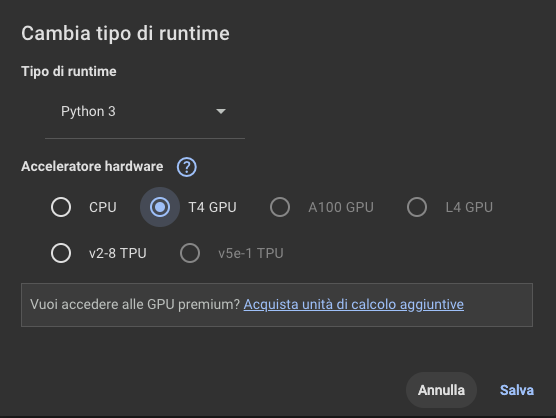

In [3]:
## To run GPU we need to chang runtime type
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img = load_img('drive/MyDrive/Dog Vision/screen/runtimeGPU.png')
display(img)

In [4]:
# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSSS!!!!!)


## Getting our data ready (turning into Tensors)
With all machine learning models, out data has to be in numerical format. So that's what we'll be doing first. **Turning our images into Tensors** (numerical representation)

Let's start by accessing our data and checking out the labels.

In [7]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


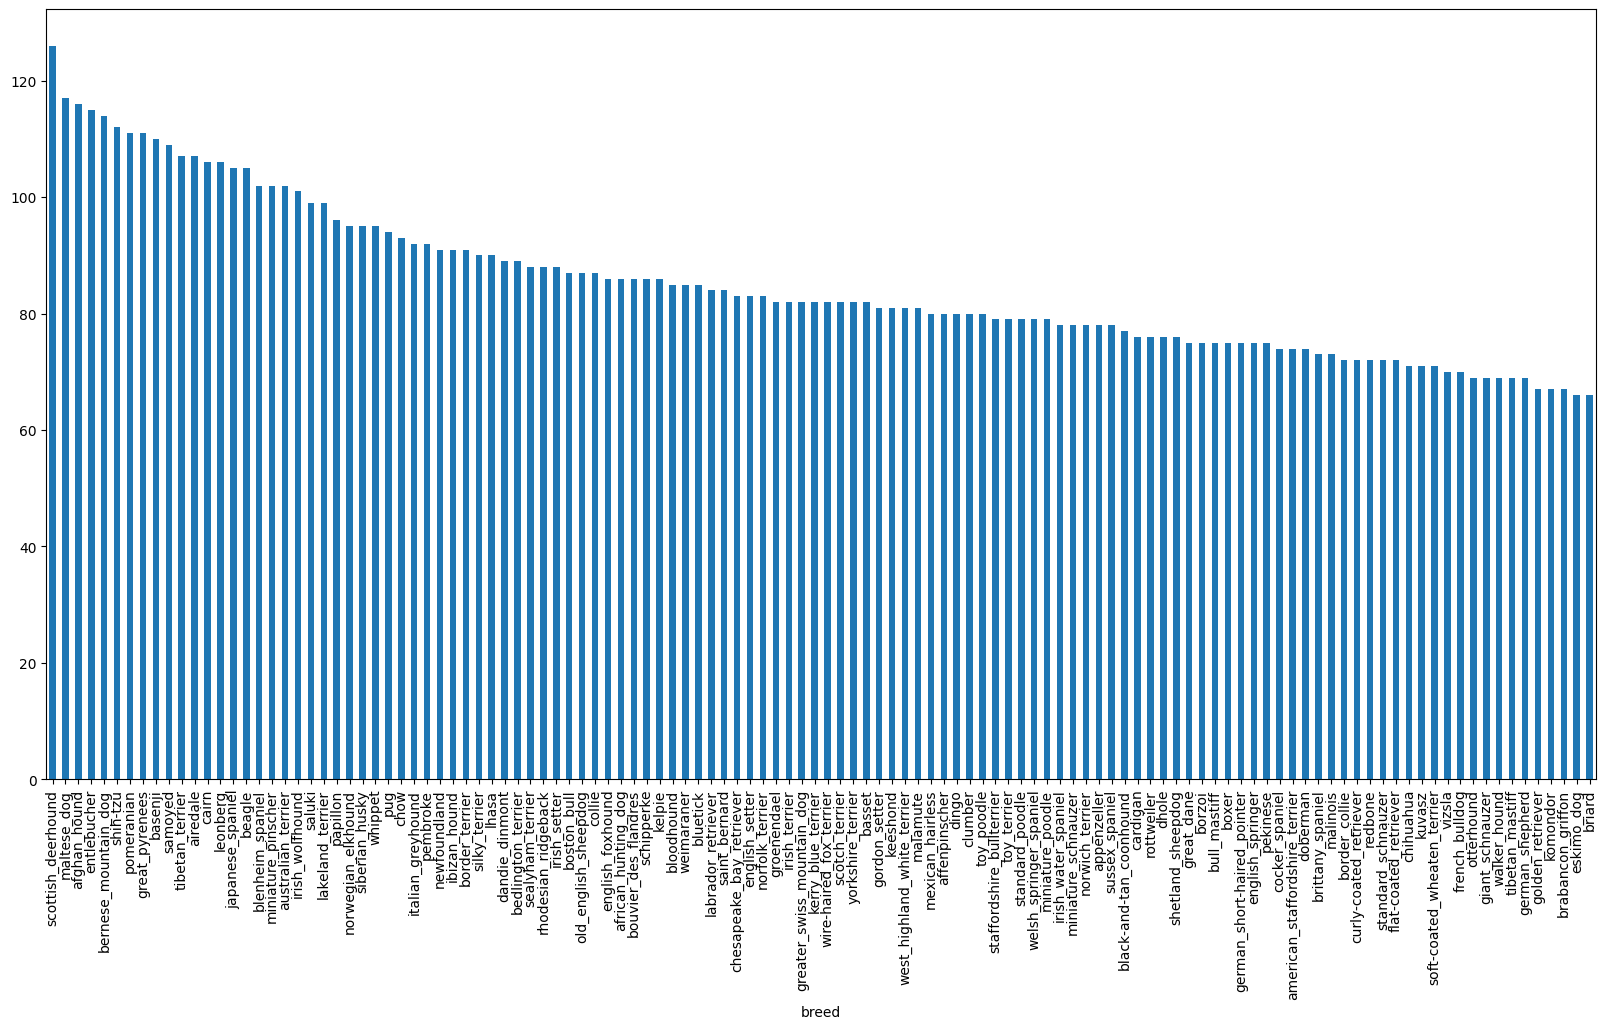

In [9]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [10]:
labels_csv["breed"].value_counts().median()

82.0